### **Construção do Chart 02 : Antigo Chart 05 da V1**

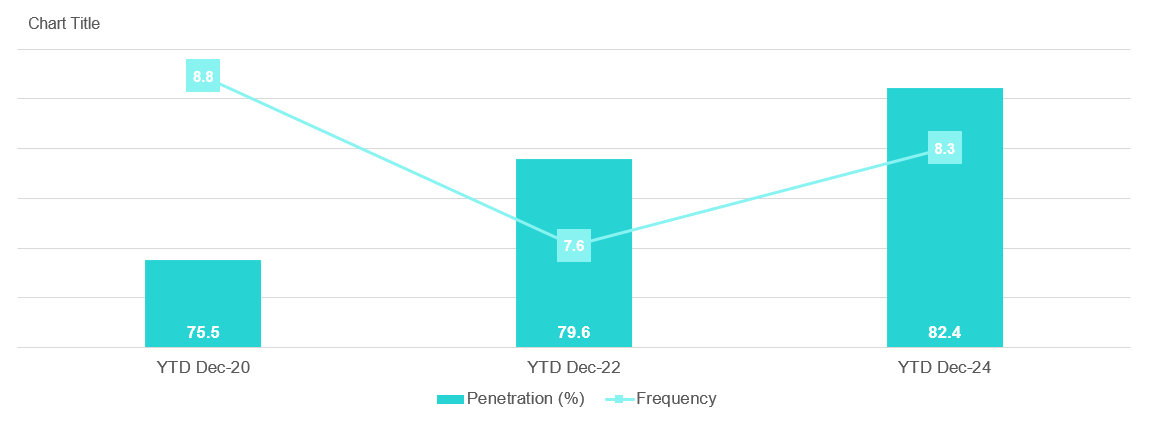

In [ ]:
import os
import pandas as pd
import numpy as np

from pptx import Presentation
from pptx.chart.data import CategoryChartData
from datetime import datetime

pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format


try:
    base_dir = os.path.dirname(os.path.abspath(__file__))  # quando for script .py
except NameError:
    base_dir = os.getcwd()  # quando for Jupyter/console interativo

# file_path = os.path.join(base_dir, "dados", "vendas_produtos.xlsx")
file_path = r"C:\Users\70088884\ei_Sheet2Slide\data\vendas_produtos.xlsx" 
df = pd.read_excel(file_path)

In [54]:
# Filtros fixos
FILTERS = {
"formats": "T. Embalagens",
"region": "Total Brasil",
"channels": "Hipermercados",
"periods": ['YTD Dec-20','YTD Dec-21','YTD Dec-22','YTD Dec-23'],
"brands": "Coca-Cola Cia"
}

# Colunas que queremos utilizar para gerar o filtro filnal
QUERY_COLUMNS = ['Brands','Formats','Region','Channels','Periods']

VARIABLES_NAME = {
"variable_01": 'Value_(R$)',
"variable_02": 'Penetration_(%)'
}

ALL_COLUMNS = [*QUERY_COLUMNS,VARIABLES_NAME.get('variable_01'),VARIABLES_NAME.get('variable_02')]

STANDARD_COLUMNS = ['periods', 'value_(r$)', 'penetration_(%)']

In [58]:
# Construção do dataframe para atualizar o chart
df_teste = df[ALL_COLUMNS]
df_teste.columns = df_teste.columns.str.lower()

# Padronizar nomes das colunas para minúsculo
df_teste.columns = df_teste.columns.str.lower()

# Agora, FILTERS também precisa estar com chaves minúsculas (já está)
# Construir a condição dinamicamente
mask = True
for key, value in FILTERS.items():
    # Se for lista, usamos isin
    if isinstance(value, list):
        mask &= df_teste[key].isin(value)
    else:
        mask &= df_teste[key] == value

# Aplicar filtro
df_filtrado = df_teste[mask]

In [60]:
# Cria pasta de output se não existir
ppt_path = r"C:\Users\70088884\beauty_sales_dashboard\templates\template_vendas.pptx"
prs = Presentation(ppt_path)

In [63]:
# Seleciona o slide 2 (index 1)
slide = prs.slides[1]

# Nome do gráfico a ser atualizado
chart_name = "CHART_02"

variable_1 = VARIABLES_NAME.get('variable_01').lower()
variable_2 = VARIABLES_NAME.get('variable_02').lower()

# Procura o gráfico pelo nome
chart_shape = None
for shape in slide.shapes:
    if shape.name == chart_name and shape.has_chart:
        chart_shape = shape
        break

if chart_shape is None:
    raise ValueError(f"Gráfico '{chart_name}' não encontrado no slide 2.")

# Cria os dados do gráfico a partir do DataFrame df_combined
chart_data = CategoryChartData()
chart_data.categories = df_filtrado['periods'].tolist()  # eixo X
chart_data.add_series(variable_1, df_filtrado[variable_1].tolist())
chart_data.add_series(variable_2, df_filtrado[variable_2].tolist())

# Atualiza o gráfico
chart_shape.chart.replace_data(chart_data)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = r"C:\Users\70088884\beauty_sales_dashboard\templates"

output_path = os.path.join(output_dir, f"testing_template_{timestamp}.pptx")
# Salva a apresentação atualizada
prs.save(output_path)
print(f"PPT atualizado salvo em: {output_path}")

PPT atualizado salvo em: C:\Users\70088884\beauty_sales_dashboard\templates\testing_template_20250924_235802.pptx
